# Twitter US Airline Sentiment

<p>The dataset is from Kaggle. <p>
More details here: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:\\Users\\30448\\Documents\\Kaggle\\twitAirline"
df = pd.read_csv( path + "\\input\\Tweets.csv")

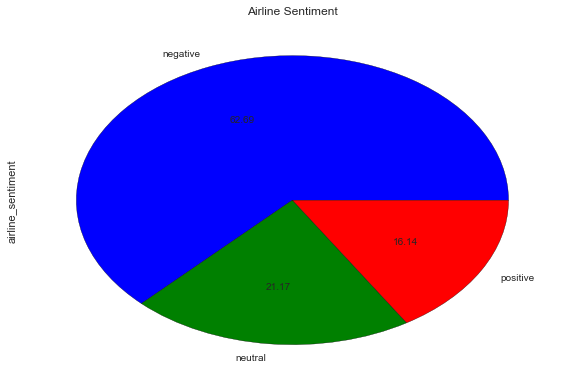

In [3]:
# What are the sentiments frequencies
df["airline_sentiment"].value_counts().plot(kind = "pie" , title = "Airline Sentiment" , autopct='%.2f')
plt.tight_layout()

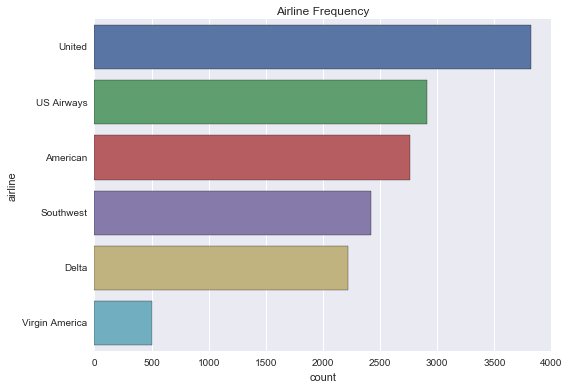

In [5]:
# airline frequency
sns.countplot(y = "airline" , data = df , order=df["airline"].value_counts().index)
sns.plt.title("Airline Frequency")
plt.tight_layout()

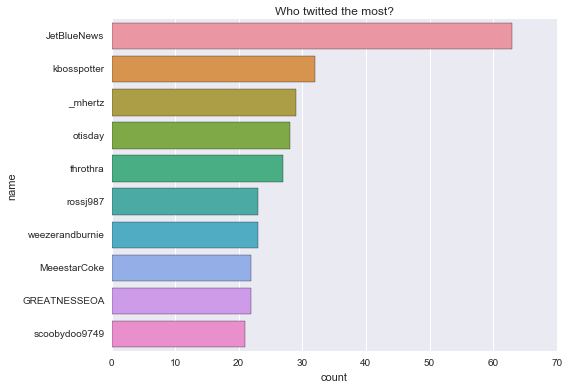

In [6]:
# Who are the person who twitted the most?
sns.countplot(y = "name" , data = df , order=df["name"].value_counts()[:10].index)
sns.plt.title("Who twitted the most?")
plt.tight_layout()

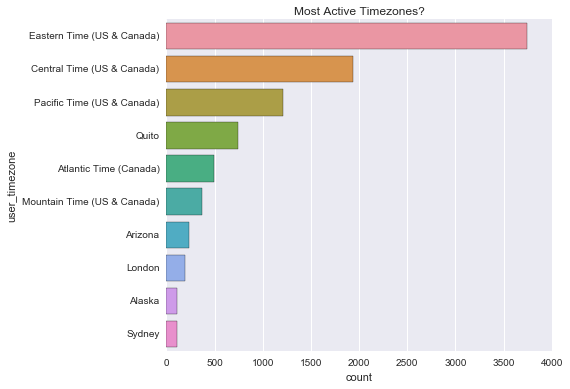

In [7]:
# What are the most active timezones
sns.countplot(y = "user_timezone" , data = df , order=df["user_timezone"].value_counts()[:10].index)
sns.plt.title("Most Active Timezones?")
plt.tight_layout()

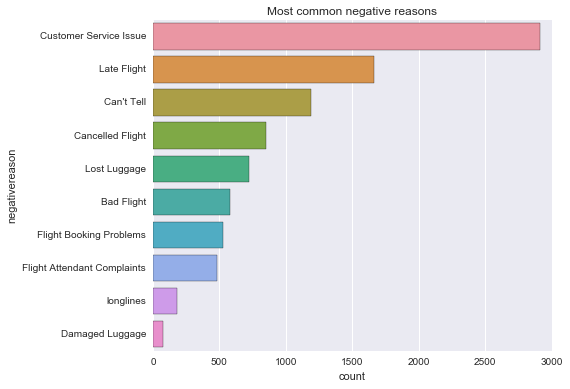

In [8]:
# What are the most common negative reasons
sns.countplot(y = "negativereason" , data = df , order=df["negativereason"].value_counts()[:10].index)
sns.plt.title("Most common negative reasons")
plt.tight_layout()

In [10]:
#time conversion
df["tweet_created"] = df["tweet_created"].apply(lambda x: pd.to_datetime(x))
df["hour"] =  df["tweet_created"].apply(lambda x: x.hour)
df["dayofweek"] =  df["tweet_created"].apply(lambda x: x.dayofweek) #monday = 0 Sunday

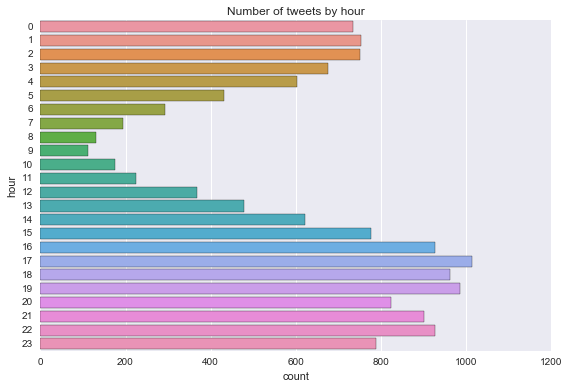

In [11]:
# What are the peak hours for twits
sns.countplot(y = "hour" , data = df , order = range(len(df["hour"].unique())))
sns.plt.title("Number of tweets by hour")
plt.tight_layout()

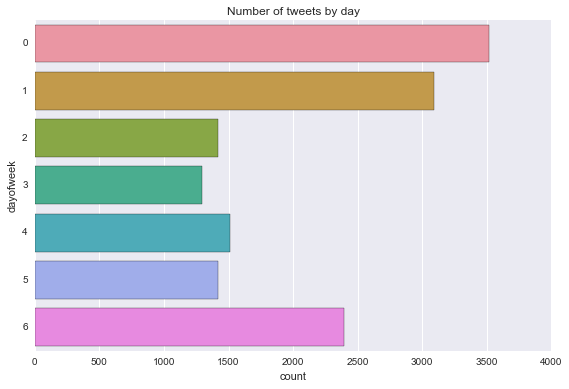

In [12]:
# What are the peak days for twits
sns.countplot(y = "dayofweek" , data = df , order = range(len(df["dayofweek"].unique())))
sns.plt.title("Number of tweets by day")
plt.tight_layout()

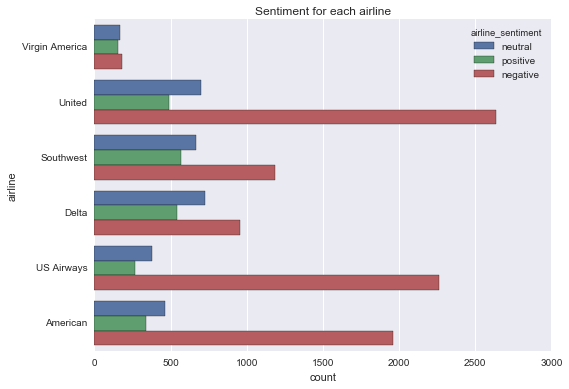

In [13]:
#What is the airline that has the best percentage of good/bad review?
sns.countplot(y = "airline" , hue = "airline_sentiment" , data = df)
sns.plt.title("Sentiment for each airline")
plt.tight_layout()

<b><u>Comments:</u><b>
<p> Virgin America has the best ratio positive/negative </p>
<p> United has the best ratio positive/negative </p>

# <b> Text processing with NLTK and BeautifulSoup </b>

In [15]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
stemmer = SnowballStemmer("english")
import re
from bs4 import BeautifulSoup  

          
def cleanword(w):    
    return re.sub('[^a-zA-Z,]' , ' ' , w)  

def cleantext(review):
    review = BeautifulSoup(review ,"lxml").get_text()
    review_words = cleanword(review.lower()).split()    
    stop = stopwords.words('english')
    stemmed_words = [stemmer.stem(w) for w in review_words if w not in stop]
    return " ".join(stemmed_words)

In [19]:
#testing the test processing function
print cleantext("@GSW2015:Winners! Steph is the best ")

gsw winner steph best


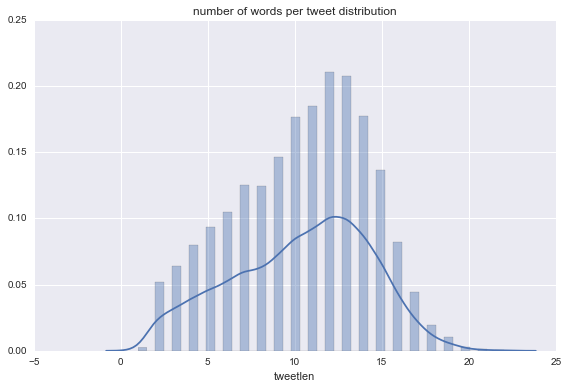

In [20]:
#adding the clean tweet length
df["text"]  = df["text"].apply(cleantext)
df["tweetlen"] = df["text"].apply(lambda x:len(x.split()))
sns.distplot(df["tweetlen"])
sns.plt.title("number of words per tweet distribution")
plt.tight_layout()

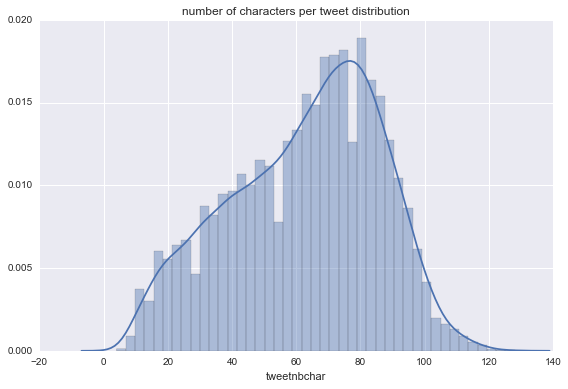

In [21]:
# number of characters per tweet
df["tweetnbchar"] = df["text"].apply(lambda x:len(x))
sns.distplot(df["tweetnbchar"])
sns.plt.title("number of characters per tweet distribution")
plt.tight_layout()

# Sentiment Analysis using ML algorithms

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split 
 
X_clean = df["text"] 
#X_train, X_test, y_train, y_test = train_test_split(X_clean, Y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_clean, df["airline_sentiment"], test_size=0.33, random_state=42)

vectorizer = TfidfVectorizer(max_df=0.5, max_features=2000, min_df=2, stop_words='english')
vectorizer.fit(X_clean)                                 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
#using the metrics package
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
def printScores(y_test, y_pred, classif_name):    
    print "--------------  "  + classif_name + "  ------------------"  
    print "recall : %0.2f" %  recall_score(y_test, y_pred) 
    print "precision : %0.2f" %  precision_score(y_test, y_pred)   
    print "f1 : %0.2f" %  f1_score(y_test, y_pred)  
    print "accuracy : %0.2f" %  accuracy_score(y_test, y_pred)  
    print "---------------------------------------------------"  
    

In [21]:
#multinomial NB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
printScores(y_test, y_pred, "MultinomialNB")

--------------  MultinomialNB  ------------------
recall : 0.75
precision : 0.75
f1 : 0.72
accuracy : 0.75
---------------------------------------------------


In [22]:
#logreg 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
printScores(y_test, y_pred, "LogisticRegression")

--------------  LogisticRegression  ------------------
recall : 0.78
precision : 0.77
f1 : 0.76
accuracy : 0.78
---------------------------------------------------


In [23]:
#random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
printScores(y_test, y_pred, "RandomForestClassifier")

--------------  RandomForestClassifier  ------------------
recall : 0.77
precision : 0.76
f1 : 0.75
accuracy : 0.77
---------------------------------------------------


In [24]:
#knn 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
printScores(y_test, y_pred, "KNeighborsClassifier")

--------------  KNeighborsClassifier  ------------------
recall : 0.73
precision : 0.72
f1 : 0.72
accuracy : 0.73
---------------------------------------------------


<p><b><u>Conclusion</u></b></p>
The best classifier seems to be the Logistic Regression